In [ ]:
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Network_Traffic_Analysis.csv', sep=',', header=0)

# Check if the 'info' column exists
if 'info' in data.columns:
    # Remove the 'info' column
    data = data.drop('info', axis=1)

# Save the processed data to the same CSV file path
data.to_csv('/content/drive/MyDrive/Processed_Network_Traffic_Analysis.csv', index=False)

In [28]:
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Processed_Network_Traffic_Analysis.csv', sep=',', header=0)

# Print the first 5 rows of the dataset
print(data.head())

   Unnamed: 0  No.      Time         Source    Destination Protocol  \
0           0    1  0.000000  192.168.1.244    192.168.1.8      TCP   
1           1    2  0.000196    192.168.1.8  192.168.1.244      TCP   
2           2    3  0.003670  192.168.1.244    192.168.1.8      TCP   
3           3    4  0.013995    192.168.1.8  192.168.1.244      FTP   
4           4    5  0.018519  192.168.1.244    192.168.1.8      TCP   

                                                Info  Length  
0  49502  >  21 [SYN] Seq=0 Win=65535 Len=0 MSS=1...      78  
1  21  >  49502 [SYN, ACK] Seq=0 Ack=1 Win=65160 ...      74  
2  49502  >  21 [ACK] Seq=1 Ack=1 Win=131712 Len=...      66  
3  Response: 220 Jamal Wallace on Discord Can Mes...     125  
4  49502  >  21 [ACK] Seq=1 Ack=60 Win=131648 Len...      66  


<Figure size 1200x800 with 0 Axes>

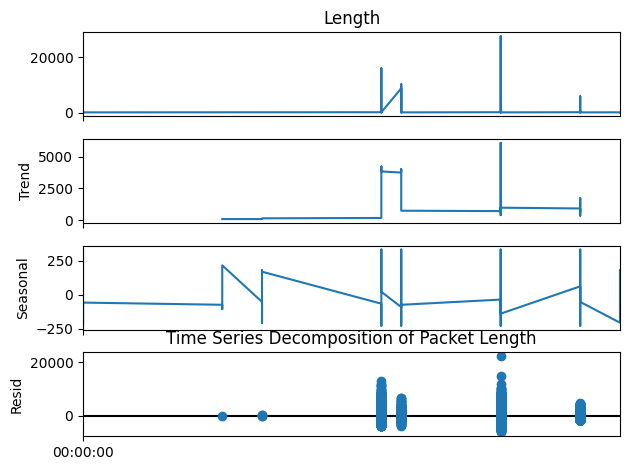

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the network traffic data from a CSV file
data = pd.read_csv('/content/drive/MyDrive/Processed_Network_Traffic_Analysis.csv')

# Convert the timestamp column to datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Set the timestamp column as the index
data.set_index('Time', inplace=True)

# Perform time series decomposition on packet length
decomposition = seasonal_decompose(data['Length'], model='additive', period=24)

# Plot the original data, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.title('Time Series Decomposition of Packet Length')
plt.show()